In [1]:
# Import Necessary Modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
from scipy.stats import probplot

In [2]:
# Import Data

nba = pd.read_csv("nba_2022-23_all_stats_with_salary.csv")
print(nba.head())

   Unnamed: 0        Player Name    Salary Position  Age     Team  GP  GS  \
0           0      Stephen Curry  48070014       PG   34      GSW  56  56   
1           1          John Wall  47345760       PG   32      LAC  34   3   
2           2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24   
3           3       LeBron James  44474988       PF   38      LAL  55  54   
4           4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47   

     MP    FG  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  
0  34.7  10.0  ...  12.5  31.0  5.8  2.0  7.8  0.192   7.5   0.1  7.5   4.7  
1  22.2   4.1  ...  17.1  27.0 -0.4  0.7  0.3  0.020  -0.8  -0.4 -1.2   0.1  
2  29.1   5.9  ...  18.4  27.7 -0.6  2.6  1.9  0.044   0.3  -0.1  0.2   1.2  
3  35.5  11.1  ...  11.6  33.3  3.2  2.4  5.6  0.138   5.5   0.6  6.1   4.0  
4  35.6  10.3  ...  13.4  30.7  4.7  2.1  6.8  0.194   6.0   1.2  7.1   3.9  

[5 rows x 52 columns]


In [3]:
# Glance at the dataset

nba.describe()
nba.info()
print(nba.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     467 non-null    int64  
 1   Player Name    467 non-null    object 
 2   Salary         467 non-null    int64  
 3   Position       467 non-null    object 
 4   Age            467 non-null    int64  
 5   Team           467 non-null    object 
 6   GP             467 non-null    int64  
 7   GS             467 non-null    int64  
 8   MP             467 non-null    float64
 9   FG             467 non-null    float64
 10  FGA            467 non-null    float64
 11  FG%            466 non-null    float64
 12  3P             467 non-null    float64
 13  3PA            467 non-null    float64
 14  3P%            454 non-null    float64
 15  2P             467 non-null    float64
 16  2PA            467 non-null    float64
 17  2P%            463 non-null    float64
 18  eFG%      

In [4]:
# Find the sum of missing values by the columns

print(nba.isnull().sum())

# Delete extra columns where a player's name appears more than once

nba.drop_duplicates(subset=['Player Name'], inplace=True)

# Some Data is Missing, but we won't remove it if it doesn't affect the model. Predictors will be monitored. 

Unnamed: 0        0
Player Name       0
Salary            0
Position          0
Age               0
Team              0
GP                0
GS                0
MP                0
FG                0
FGA               0
FG%               1
3P                0
3PA               0
3P%              13
2P                0
2PA               0
2P%               4
eFG%              1
FT                0
FTA               0
FT%              23
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
Total Minutes     0
PER               0
TS%               1
3PAr              1
FTr               1
ORB%              0
DRB%              0
TRB%              0
AST%              0
STL%              0
BLK%              0
TOV%              0
USG%              0
OWS               0
DWS               0
WS                0
WS/48             0
OBPM              0
DBPM              0


In [5]:
# Reduce Position into fewer classes

print(nba["Position"].unique())

nba["Position"] = nba["Position"].replace({
    "PG-SG": "PG",
    "SF-SG": "SF",
    "SG-SF": "SG",
    "SG-PG": "SG",
    "SF-PF": "SF"
})

print(nba["Position"].unique())

['PG' 'PF' 'SG' 'SF' 'PG-SG' 'C' 'SF-SG' 'SG-PG' 'SF-PF']
['PG' 'PF' 'SG' 'SF' 'C']


In [6]:
# Create Starter Variable based on threshold

nba["Starter"] = ((nba["GS"] / nba["GP"] > 0.5) & (nba["GP"] > 20)).astype(int)

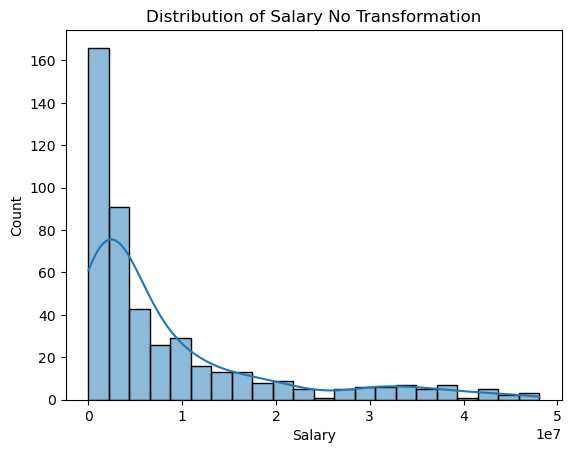

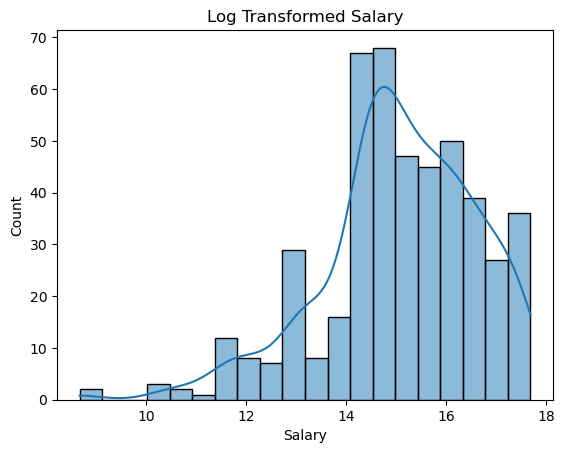

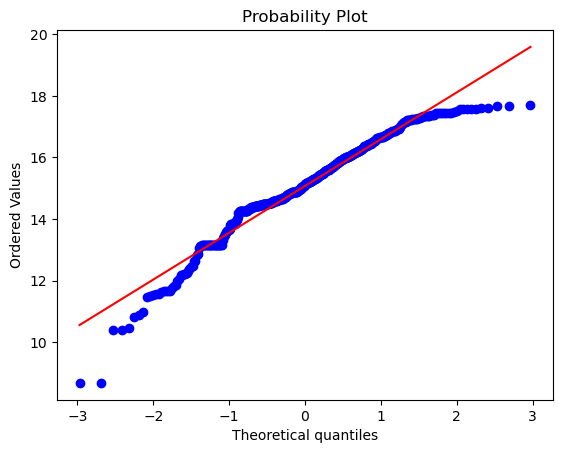

In [7]:
# EXPLORATORY DATA ANALYSIS 

# EXPLORE SALARY

sns.histplot(nba["Salary"], kde= True)
plt.title("Distribution of Salary No Transformation")
plt.show()

stats.shapiro(nba["Salary"])

# Apply Box-Cox transformation

transformed_data, lambda_opt = stats.boxcox(nba["Salary"])

# TRANSFORM SALARY

sns.histplot(np.log1p(nba["Salary"]), kde = True)
plt.title("Log Transformed Salary")
plt.show()

# QQ-plot
fig = plt.figure()
res = probplot(np.log1p(nba["Salary"]), plot = plt)
plt.show()

# Shapiro Test for Normality
stats.shapiro(np.log1p(nba["Salary"]))

# Convert Salary to log Transformed Salary to make easier computations
nba["Salary"] =  np.log1p(nba["Salary"])


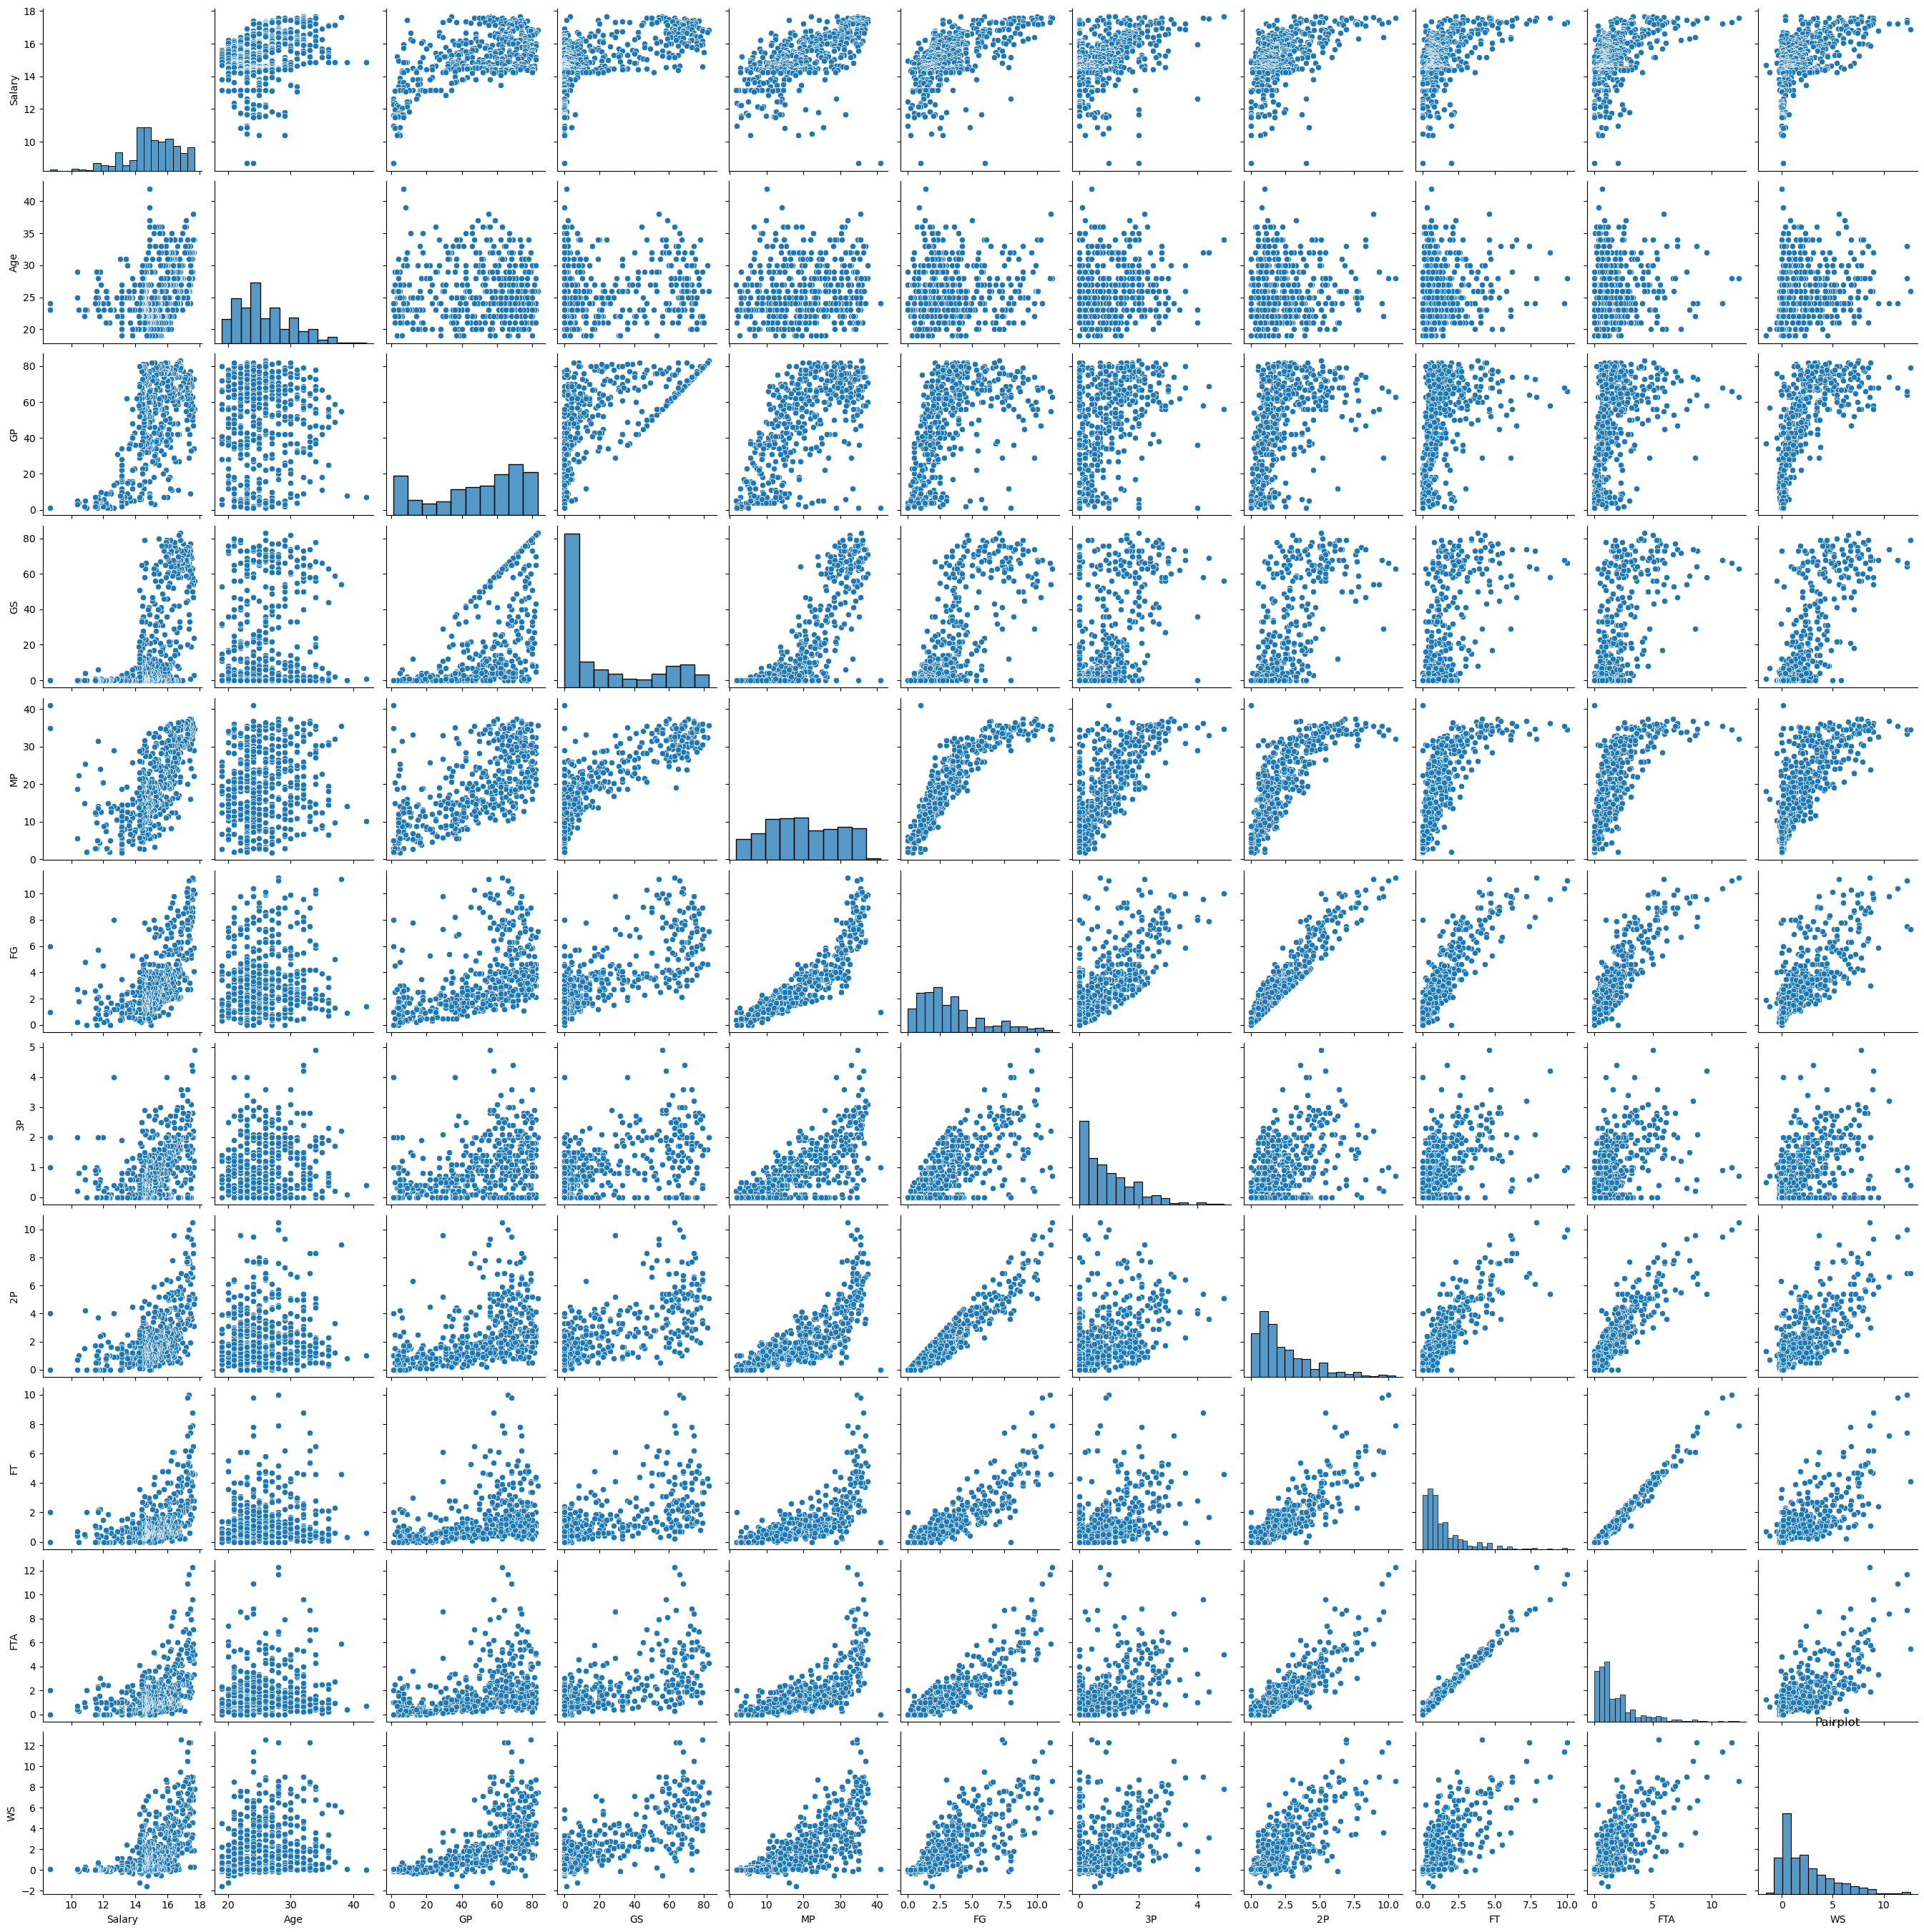

In [8]:
# Pairplot of Variables of Interest

nba_num = nba[["Salary", "Age", "GP", "GS", "MP", "FG", "3P", "2P","FT", "FTA", "WS"]]
sns.pairplot(nba_num)
plt.title("Pairplot")
plt.show()

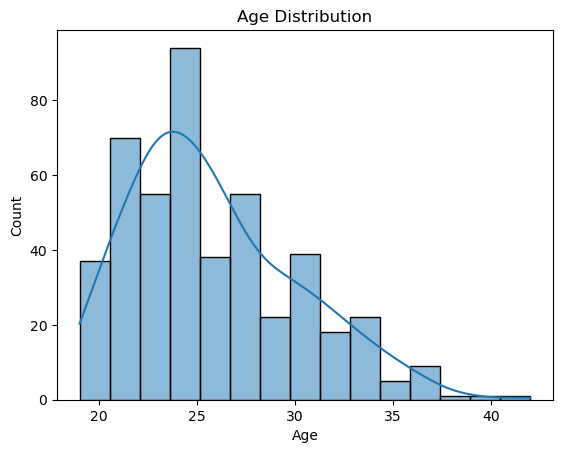

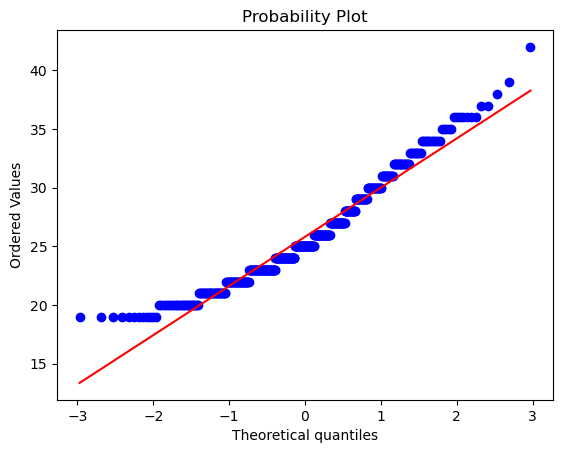

In [9]:
# Distribution of Age

sns.histplot(x = "Age", data = nba, kde = True)
plt.title("Age Distribution")
plt.show()

stats.shapiro(nba["Age"])

# QQ-plot
fig = plt.figure()
res = probplot(nba["Age"], plot = plt)
plt.show()

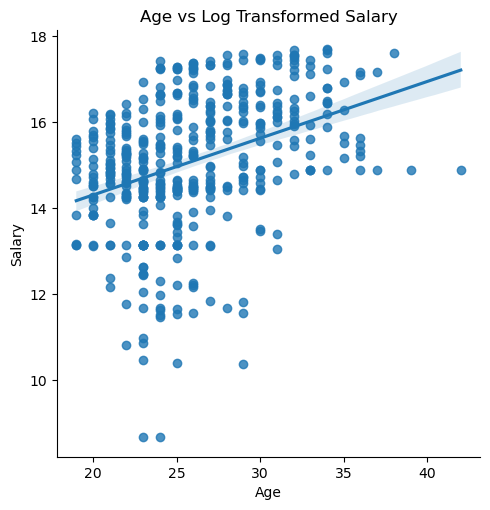

In [10]:
# LM PLOT

sns.lmplot(data = nba, x = "Age", y = "Salary")
plt.title("Age vs Log Transformed Salary")
plt.show()

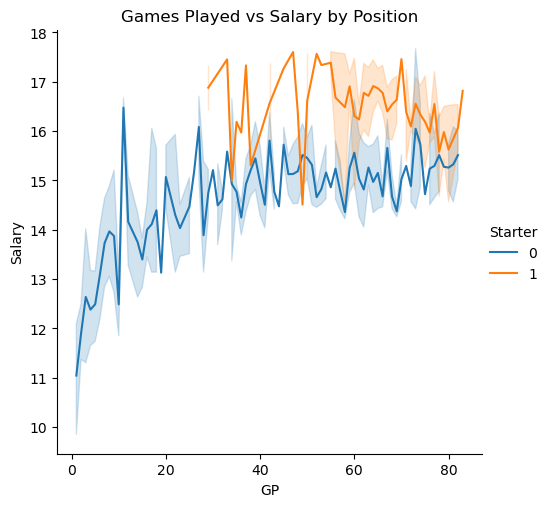

In [11]:
# Relationship between GP vs Salary with Position Distinction

sns.relplot(
    data = nba, kind="line",
    x="GP", y="Salary", hue="Starter",
    sort=True
)
plt.title("Games Played vs Salary by Position")
plt.show()

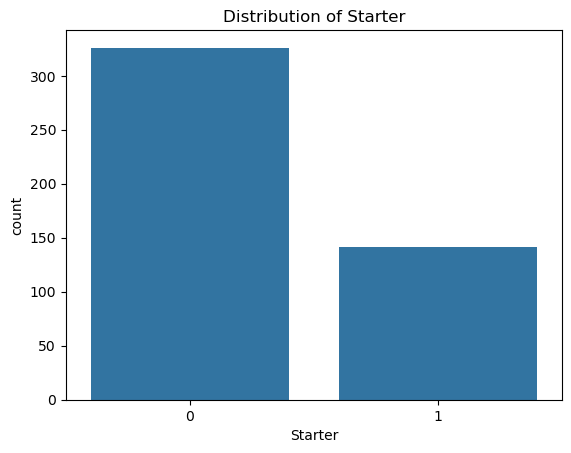

In [12]:
# Categorical Data

# Starter
sns.countplot(x = "Starter", data = nba)
plt.title("Distribution of Starter")
plt.show()

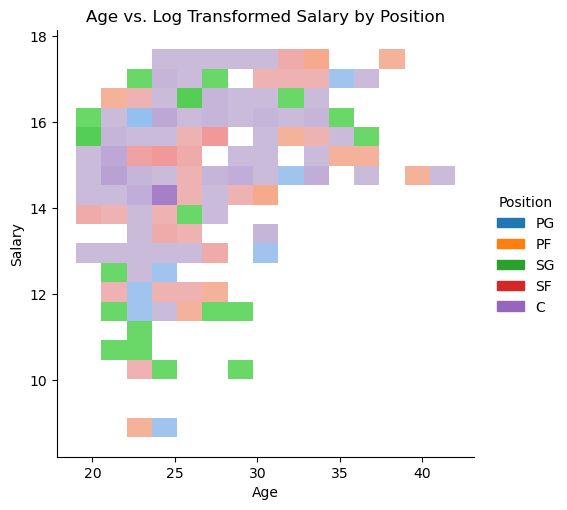

In [13]:
sns.displot(x = "Age",y = "Salary", hue = "Position", data = nba)
plt.title("Age vs. Log Transformed Salary by Position")
plt.show()

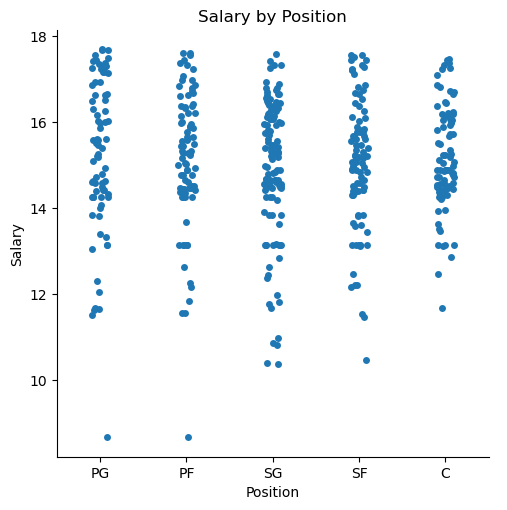

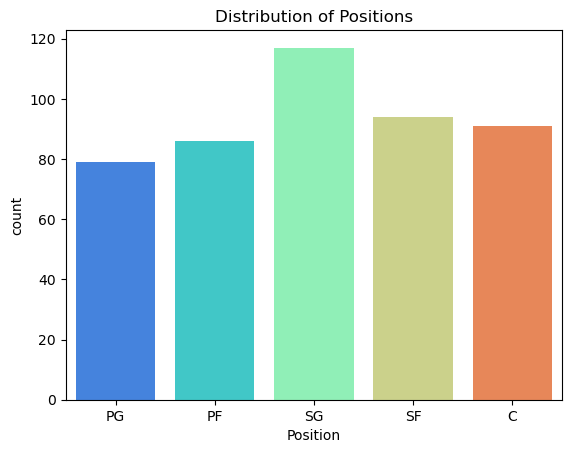

In [14]:
# POSITION 

sns.catplot(data = nba, x = "Position", y ="Salary")
plt.title("Salary by Position")
plt.show()

sns.countplot(x="Position", data=nba, hue="Position", palette="rainbow", legend=False)
plt.title("Distribution of Positions")
plt.show()

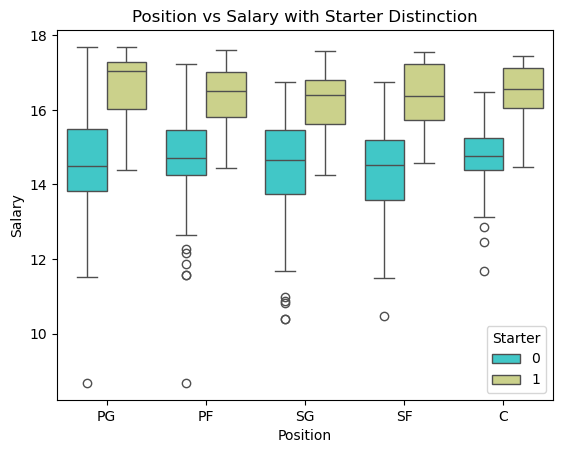

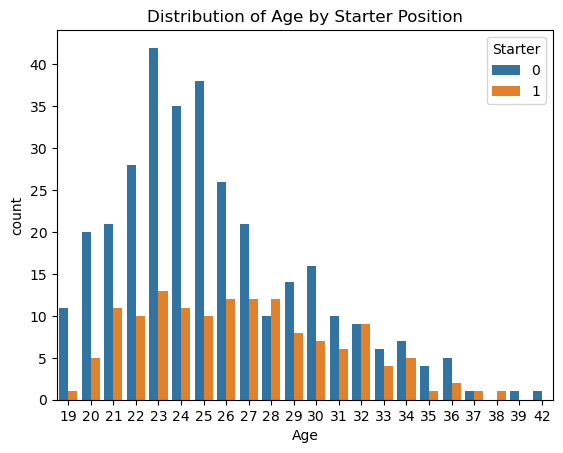

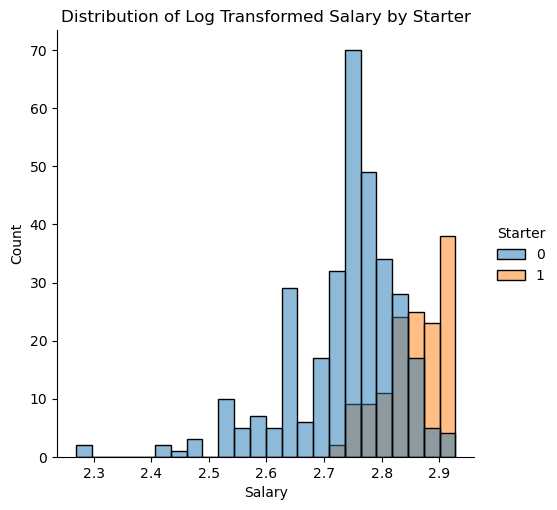

In [15]:
# STARTER

sns.boxplot(x = "Position", y = "Salary", hue = "Starter", data = nba, palette = "rainbow")
plt.title("Position vs Salary with Starter Distinction")
plt.show()

sns.countplot(x = "Age", hue = "Starter", data = nba)
plt.title("Distribution of Age by Starter Position")
plt.show()

sns.displot(x = np.log1p(nba["Salary"]), hue = "Starter", data = nba)
plt.title("Distribution of Log Transformed Salary by Starter")
plt.show()

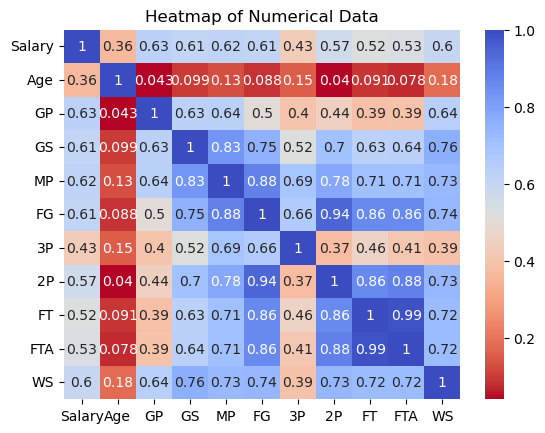

   Variable  Correlation with Salary
0    Salary                 1.000000
1        GP                 0.629195
2        MP                 0.619803
3        FG                 0.613794
4        GS                 0.609707
5        WS                 0.598632
6        2P                 0.568234
7       FTA                 0.531696
8        FT                 0.523362
9        3P                 0.428491
10      Age                 0.364925


In [16]:
# CORRELATION OF DATA

sns.heatmap(nba_num.corr(), cmap= "coolwarm_r", annot= True)
plt.title("Heatmap of Numerical Data")
plt.show()

correlation_df = nba_num.corr()
salary_correlation = correlation_df["Salary"].dropna().sort_values(ascending=False)
sorted_corr_df = salary_correlation.to_frame().reset_index()
sorted_corr_df.columns = ["Variable", "Correlation with Salary"]
print(sorted_corr_df)

In [17]:
# Import modules NECESSARY FOR MODEL BUILDING

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
# MULTIPLE LINEAR REGRESSION MODEL

X = nba[["GP", "MP", "FG", "GS", "Age", "Starter"]].copy()
X = pd.concat([X, nba.filter(like="Position_").astype(int)], axis=1)  # Convert Position dummies to int
y = np.log1p(nba["Salary"])  

In [19]:
# Check VIF of First Set of Predictors

X_vif = nba[["GP", "MP", "FG", "GS", "Age", "Starter"]]
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))

# Check VIF of Second Set

X_vif = nba[["GP", "Age", "Starter"]]
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))

# The second set of predictors all have VIFs < 6

   Feature        VIF
1       MP  35.433798
3       GS  17.557074
2       FG  13.266152
5  Starter  10.632162
0       GP   9.734334
4      Age   8.507515
   Feature       VIF
0       GP  5.601727
1      Age  4.493666
2  Starter  1.827583


In [20]:
# Create interaction term

nba["Age_Starter"] = nba["Age"] * nba["Starter"]

# Define X with interaction term 

X = nba[["GP", "Age", "Starter", "Age_Starter"] + list(nba.filter(like="Position_").columns)]
y = np.log1p(nba["Salary"])  # Apply log transformation to normalize Salary

# Train-Test Split (80% Train, 20% Test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [21]:
# Results of Final MLR

print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)
print("Training R²:", regr.score(X_train, y_train))
print("Testing R²:", regr.score(X_test, y_test))

# Predictions

y_pred = regr.predict(X_test)

Coefficients: [0.00191223 0.00719055 0.04217862 0.00068948]
Intercept: 2.476147226575206
Training R²: 0.5551471245907413
Testing R²: 0.5736530972182426


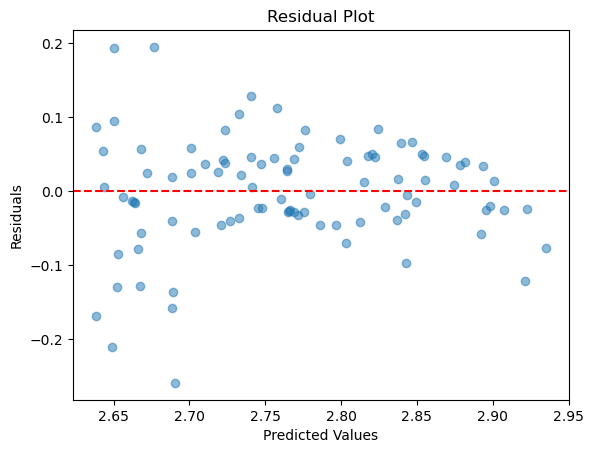

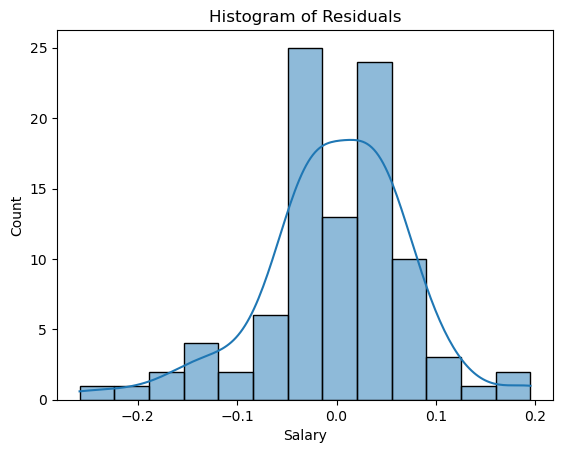

In [22]:
# Residual Plot

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

sns.histplot(residuals, kde = True)
plt.title("Histogram of Residuals")
plt.show()

In [23]:
print(nba.Position.unique())
print(nba.columns)  # Look for "Position_PG", "Position_SG", etc.

['PG' 'PF' 'SG' 'SF' 'C']
Index(['Unnamed: 0', 'Player Name', 'Salary', 'Position', 'Age', 'Team', 'GP',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Starter',
       'Age_Starter'],
      dtype='object')


In [24]:
# Perform OLS to see significant predictors

nba["Position"] = nba["Position"].astype("category")
nba = pd.get_dummies(nba, columns=["Position"], drop_first=True)


X = nba[["GP", "MP", "FG", "GS", "Age", "Starter"]].copy()
X = pd.concat([X, nba.filter(like="Position_").astype(int)], axis=1)

y = np.log1p(nba["Salary"])  
X = sm.add_constant(X)

ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     69.66
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           2.43e-85
Time:                        10:58:15   Log-Likelihood:                 622.68
No. Observations:                 467   AIC:                            -1223.
Df Residuals:                     456   BIC:                            -1178.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4792      0.021    118.021      

In [25]:
# RANDOM FOREST MODEL

X = nba[["GP", "MP", "FG", "WS", "GS", "Age", "Starter", "2P", "FT"] + 
        list(nba.filter(like="Position_").columns)] 

X = pd.get_dummies(X, drop_first=True)  
y = np.log1p(nba["Salary"])  

# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions

y_pred_rf = rf_reg.predict(X_test)

# Evaluate performance

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print(f"Random Forest R²: {r2_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.4f}")

# Cross-validation

kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_rf_cv = cross_val_predict(rf_reg, X, y, cv=kf)
r2_rf_cv = r2_score(y, y_pred_rf_cv)

print(f"Random Forest Cross-Validation R²: {r2_rf_cv:.4f}")

Random Forest R²: 0.7104
Random Forest RMSE: 0.0610
Random Forest Cross-Validation R²: 0.6875


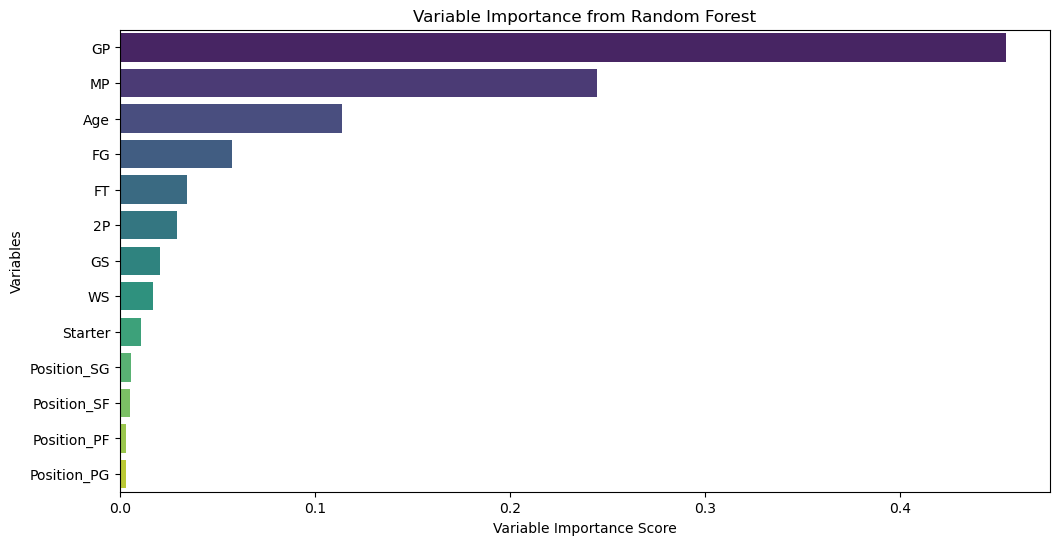

In [26]:
# Variable Importance

feature_importance = pd.Series(rf_reg.feature_importances_, index=X.columns).sort_values(ascending=False)

# Variable Importance Plot

plt.figure(figsize=(12, 6))
sns.barplot(x = feature_importance.values, y = feature_importance.index, hue = feature_importance.index, palette="viridis")
plt.xlabel("Variable Importance Score")
plt.ylabel("Variables")
plt.title("Variable Importance from Random Forest")
plt.show()